# Final Project
CS 3120 - Seunghee Lee

Using Sentiment Analysis to analyze business reviews to determine if they are positive or not

# Problem: 
Hotels, restaurants, and other businesses need an easier way to tell if reviews left on review sites such as TripAdvisor or Google are net positive or not without having to manually parse through all the reviews. If this can be automated with the use of Machine Learning, it would greatly benefit businesses.

# Proposed Solution:
Utilize Sentiment Analysis to create a model to parse through raw customer review data to get the overall satisfaction rating of customers.

For this project, I will be using datasets from Kaggle, cited below. Various reviews of restaurants will be used to test the ability of the sentiment intensity analyzer and the accuracy of the prediction model.

# Part 1 - Import NLTK and Sentiment Intensity Analyzerfrom VADER
The first thing we need to do for a sentiment analyzer is import NLTK (Natural Language Toolkit)

This is the go to API for natural language processing and allows us to process text data better.

We will also be importing the SentimentIntensityAnalyzer from the nltk package for the basis of our sentiment analysis.

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentimentAnalyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Part 2 - Test the Sentiment Analyzer 

We can test the analyzer to see if it is working sorrectly by feeding it known positive and negative text.

The analyzer will give four values, negative, neutral, positive, and compound. These show how negative, neutral, or positive a piece of text is. The fourth value, the compound score, is the calculated sum of all the lexicon ratings normalized between -1(most negative) and +1 (most positive).

So we can judge the sentiment of a chunk of text or a string by looking at this compound value as such:

positive  : (compound score >= 0.05) 

neutral  : (compound score > -0.05) & (compound score < 0.05) 

negative  : (compound score <= -0.05)

First we will feed the analyzer a positive statment.

In [ ]:
positive = "I had a fantastic time!"
sentimentAnalyzer.polarity_scores(positive)

{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5983}

We can see here that the string, **"I had a fantastic time!!!!"** had a compound score of 0.5983, showing that this statment has a very positive sentiment


On the other hand, a negative statement should give us a negative compound score.

In [ ]:
negative = "I really did not like the bed and the room was too stuffy."
sentimentAnalyzer.polarity_scores(negative)

{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.3343}

We can see here that the review, **"I really did not like the bed and the room was too stuffy"** had a compound score of -0.3343, which shows us that the statement was very negative.

Of course, a neutral sentiment can also be achieved, if we just say something like this:

In [ ]:
neutral = "I rode on the train"
sentimentAnalyzer.polarity_scores(neutral)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Here we can see that the overall compound was 0.0, with a nautral value of 1.0. Meaning that the statement was neither positive nor negative.

# Part 3 - Analyze a real dataset
In order to analyze datasets in the csv/tsv format, we will be needing **pandas** as well as **numpy**, so let's go ahead and import them and then import one of our datasets.

This Restaurant Reviews dataset has a column called **"Liked"**, which has a value of 0 or 1, 1 being they liked it and 0 being they did not. The first column contains the actual review itself. 



The dataset can be downloaded from https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews

So first, we will grab the total value counts for the Liked category.

In [ ]:
import numpy as np
import pandas as pd

!mkdir datasets
!cp -r -r /content/drive/MyDrive/MachineLearning/Restaurant_Reviews.tsv /content/datasets/

df = pd.read_csv('/content/datasets/Restaurant_Reviews.tsv', sep = '\t')
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

And we can see that the dataset contains 500 positive and 500 negative reviews

Now, we can parse through the dataset and create a new section for the score generated by our sentiment analyser.

Let's also make a section to just see the composit scores.

In [ ]:
df['Sentiment scores'] = df['Review'].apply(lambda Review: sentimentAnalyzer.polarity_scores(Review))
df.head(1000)
df['Compound scores'] = df['Sentiment scores'].apply(lambda score_dict: score_dict['compound'])
df.head(1000)

,Review,Liked,Sentiment scores,Compound scores
0,Wow... Loved this place.,1,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.5994
1,Crust is not good.,0,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'comp...",-0.3412
2,Not tasty and the texture was just nasty.,0,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou...",-0.5574
3,Stopped by during the late May bank holiday of...,1,"{'neg': 0.093, 'neu': 0.585, 'pos': 0.322, 'co...",0.6908
4,The selection on the menu was great and so wer...,1,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.6249
...,...,...,...,...
995,I think food should have flavor and texture an...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
996,Appetite instantly gone.,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
997,Overall I was not impressed and would not go b...,0,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp...",-0.3724
998,"The whole experience was underwhelming, and I ...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


# Step 4 - Clean up the dataset data

Next, we will need the stop words from nltk in order to clean up the date for training use.

The stop words are words that are commonly used words that are often ignored by search engines and other algorithms. Stop words often have no meaning to them and in order to clean up the date, we will be removing them except for 'not'.

We can obtain the stop words from nltk as such:

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now we will create a new dataset table with the cleaned data, by appending reviews to the new dataset cleaned to remove stop words and standardize all case. Since there are 1000 items in the original dataset, we will iterate 1000 times.

In [ ]:
import re
consolidate=[]

for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  consolidate.append(review)

The trimmed and cleaned data will look like this:

In [ ]:
print(consolidate)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

Using sklearn, we will convert the text data to numerical token count data, putting this into our X array. Then in the y, we will put the value for the polarity (Liked/Disliked).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2000)

!mkdir dictionary

X = cv.fit_transform(consolidate).toarray()
#y = df.iloc[:, -1].values
y = df['Liked']

Next, we will need a BoW sentiment model if we want to use our analyzer as a predictor in the future. A Bag of Words (BoW) is a statistical language model that is usually used to analyze text data based on word count. This allows us to transform the dataset into vectors in which each word in the data is assigned a score. the BoW model is only concerned with the number of times a word is repeated. The order is not significant in this case

In [ ]:
import pickle
bow_path = '/content/dictionary/BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

**Note:** *at first I tried to set the y to the values from the last column of the data array, but since the last column was no longer the 1/0 column 'Liked', it threw me an error because the Classifier could not handle floats. So I fixed it, as seen above.*

# Step 5 - Split data into training and testing data


As has been done before in class, the data will be split into training and testing data using sklearn. We will have the test size be a standard 0.20.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

# Step 6 - Fit Data into Model
***4. Describe the machine learning algorithms or deep learning algorithms that are used in your project and the reason of selecting such models.***

The chart here provided by sklearn gives us a cheat sheet to determine which model and algorithm would be best for the given data and situation: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

For the purpose of the sentiment analysis of a text dataset of <100k samples, it was decided that the Naive Bayes algorithm would be best for the purpose of this project, specifically the Gaussian Naive Bayes.

The Gaussian varient of the Naive Bayes model was chosen due to the better accuracy and overall performance from the model when dealing with gaussian, or normal, distribution in data.

Naive bayes is a supervised learning algorithm used for classification and uses features to make a prediction on a target variable, which for the case of sentiment analysis was a good fitting choice of an algorithm.


So we can import GaussianNB model from sklearn and fit our data like this:


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

After fitting our data, we can then generate a confusion matrix as well as the accuracy score for the model.

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

accuracy_score(y_test, y_pred)

[[48 50]
 [12 90]]


0.69

So our final confusion matrix is:

[48 50]

 [12 90]

And our model had an accuracy score of **69%**

We can visualize the Confusion Matrix using matplotlib and seaborn:

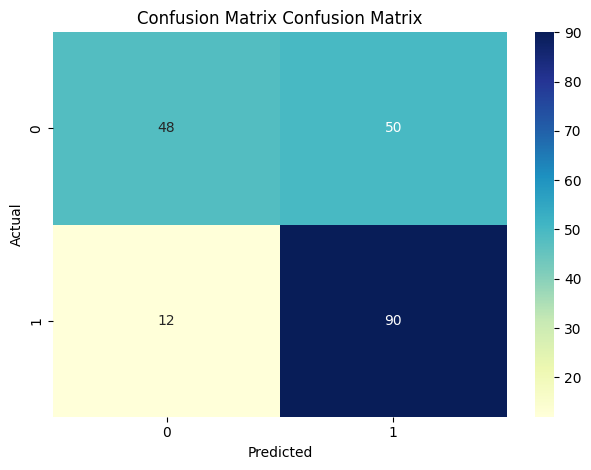

# Conclusion

We now have a Sentiment Analysis model that is trained with an accuracy score of 69%. With more adjustments and fine tuning, the model could have better performance and better accuracy. However, we can now use this model along with the generated BoW model to do predictions on other datasets.

# Final code and results

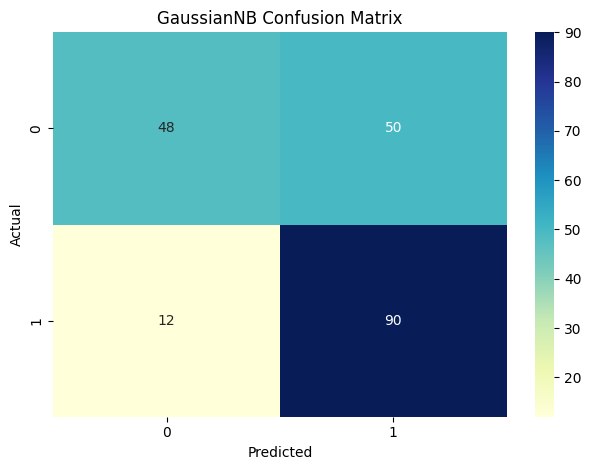

Accuracy score: 0.69
Model had an accuracy score of 69.0%


In [1]:
import os
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

# function to plot confusion matrices
def plot_confusion_matrix(cnf_matrix, name):
    plt.clf()
    cm = pd.DataFrame(cnf_matrix, index=np.unique(y), columns=np.unique(y))
    cm.index.name = "Actual"
    cm.columns.name = "Predicted"
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title(name + ' Confusion Matrix')
    plt.tight_layout()
    plt.show()

# download natural language lexicon and initialize sentiment analyzer 
nltk.download('vader_lexicon', quiet=True)
sentimentAnalyzer = SentimentIntensityAnalyzer()

# import dataset from google drive and read
if os.path.exists('/content/datasets/') == False:
  !mkdir datasets

!cp -r -r /content/drive/MyDrive/MachineLearning/Restaurant_Reviews.tsv /content/datasets/
df = pd.read_csv('/content/datasets/Restaurant_Reviews.tsv', sep = '\t')

# create sentiment scores and compound scores columms
df['Sentiment scores'] = df['Review'].apply(lambda Review: sentimentAnalyzer.polarity_scores(Review))
df.head(1000)
df['Compound scores'] = df['Sentiment scores'].apply(lambda score_dict: score_dict['compound'])
df.head(1000)

# get stop words from nltk
nltk.download('stopwords', quiet=True)
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

# create new data with the cleaned dataset data with recursion
consolidate = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  consolidate.append(review)
  consolidate

# create Bag of Words dictionary
cv = CountVectorizer(max_features = 2000)

if os.path.exists('/content/dictionary/') == False:
  !mkdir dictionary

X = cv.fit_transform(consolidate).toarray()
y = df['Liked']

bow_path = '/content/dictionary/BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

# fit data to model using GaussianNB algorithm
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# measure model performance and accuracy
y_pred = model.predict(X_test)

# generate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# print results
plot_confusion_matrix(confusion_matrix, 'GaussianNB')
score = accuracy_score(y_test, y_pred)
print("Accuracy score: " + str(score))
print("Model had an accuracy score of " + str(score * 100) + "%")

In [ ]:
df['Sentiment scores'] = df['Review'].apply(lambda Review: sentimentAnalyzer.polarity_scores(Review))
df.head(1000)
df['Compound scores'] = df['Sentiment scores'].apply(lambda score_dict: score_dict['compound'])
df.head(1000)

,Review,Liked,Sentiment scores,Compound scores
0,Wow... Loved this place.,1,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.5994
1,Crust is not good.,0,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'comp...",-0.3412
2,Not tasty and the texture was just nasty.,0,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou...",-0.5574
3,Stopped by during the late May bank holiday of...,1,"{'neg': 0.093, 'neu': 0.585, 'pos': 0.322, 'co...",0.6908
4,The selection on the menu was great and so wer...,1,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.6249
...,...,...,...,...
995,I think food should have flavor and texture an...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
996,Appetite instantly gone.,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
997,Overall I was not impressed and would not go b...,0,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp...",-0.3724
998,"The whole experience was underwhelming, and I ...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


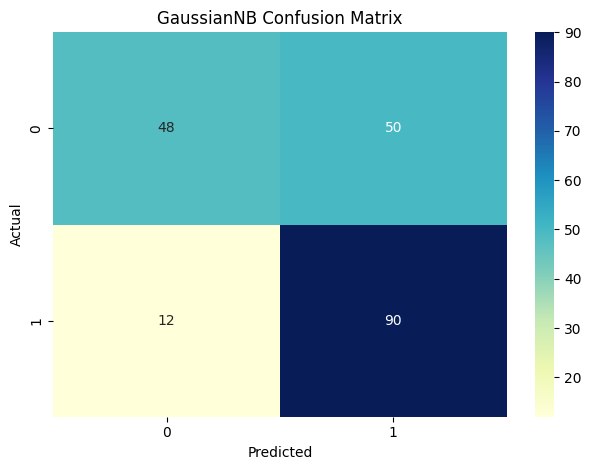

# Libraries/Packages Used:
os - to manage directories and file system

numpy - For calculations and computations

pandas - For data analysis

nltk - For Natural Language functions and features

pickle - For generation of BoW sentiment model

matplotlib - For Plotting and visualization

seaborn - For Confusion Matrix Plotting

re - For regular expression operations

sklearn - For algorithms and models, crucial for machine learning

# Resources/Datasets:

1.9. naive Bayes. scikit. (n.d.). Retrieved May 4, 2023, from https://scikit-learn.org/stable/modules/naive_bayes.html 

.

Alam, M. H., Ryu, W.-J., Lee, S., 2016. Joint multi-grain topic sentiment: modeling semantic aspects for online reviews. Information Sciences 339, 206–223. (https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews)

.

Ankthon. (2021, October 7). Python: Sentiment analysis using Vader. GeeksforGeeks. Retrieved April 26, 2023, from https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/# 

.

Anwar, Arsh, "Restaurant Reviews
Dataset for Natural language Processing" https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews

.

Natural language processing: Bag-of-words cheatsheet. Codecademy. (n.d.). Retrieved May 4, 2023, from https://www.codecademy.com/learn/dscp-natural-language-processing/modules/dscp-bag-of-words/cheatsheet 

.

Sharma, M. (2020, May 11). Sentiment Analysis (introduction to naive Bayes algorithm). Medium. Retrieved May 4, 2023, from https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91 

.

Tsukerman, E. (2019). Machine Learning for Cybersecurity Cookbook: Over 80 recipes on how to implement machine learning algorithms for building security systems using Python. Packt Publishing. (https://github.com/PacktPublishing/Machine-Learning-for-Cybersecurity-Cookbook)

.

Turing. (2022, March 11). Naive Bayes algorithm in ML: Simplifying classification problems. Naive Bayes Algorithm in ML: Simplifying Classification Problems. Retrieved May 4, 2023, from https://www.turing.com/kb/an-introduction-to-naive-bayes-algorithm-for-beginners 